In [1]:
import numpy as np 
import astropy.units as u
# -- feasibgs --
from feasibgs import util as UT
from feasibgs import skymodel as Sky
# -- desi -- 
import desimodel.io
import desisim.simexp

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
# ccd wavelength limit 
params = desimodel.io.load_desiparams() 
wavemin = params['ccd']['b']['wavemin']
wavemax = params['ccd']['z']['wavemax']
print('%f < lambda < %f' % (wavemin, wavemax))

waves = np.linspace(wavemin, wavemax, 1e4) * u.angstrom
config = desisim.simexp._specsim_config_for_wave((waves).to('Angstrom').value, specsim_config_file='desi')
surface_brightness_dict = config.load_table(config.atmosphere.sky, 'surface_brightness', as_dict=True)

3533.000000 < lambda < 9913.000000


/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  import sys


In [4]:
theta_dark = (1.3,
              30., 
              10., 
              180., 
              4.86761390e+09, 
              -25., 
              150.,
              np.pi, 
              0., 
              140., 
              -21.68
             )
sky_dark = Sky.skySpec(*theta_dark)

/Users/chang/anaconda2/lib/python2.7/site-packages/feasibgs/skymodel.py:215: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  coeffs = pd.DataFrame.from_csv(f)


(0.0, 10.0)

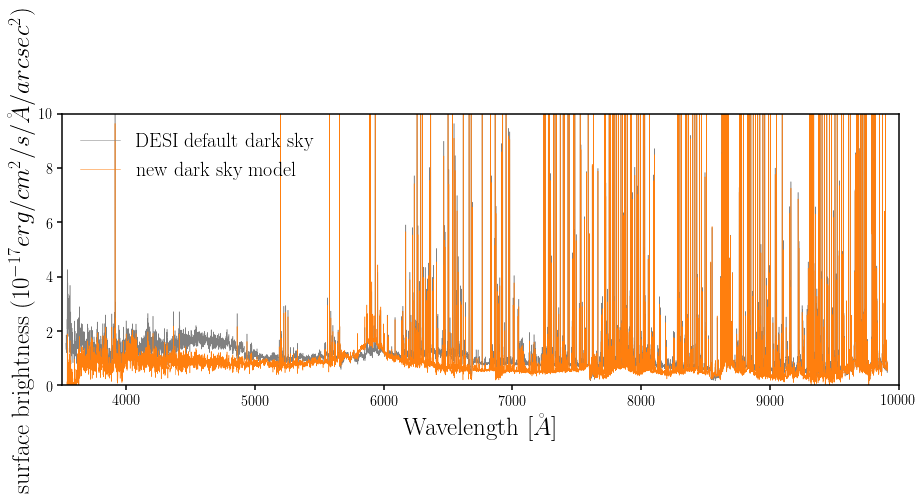

In [9]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(config.wavelength, surface_brightness_dict['dark'].value, c='gray', lw=0.5, label='DESI default dark sky')
sub.plot(config.wavelength, sky_dark.surface_brightness(config.wavelength.value), 
         c='C1', lw=0.5, label='new dark sky model')
#sub.plot(config.wavelength, sky_dark.Icont(config.wavelength.value)/np.pi)
sub.legend(loc='upper left', fontsize=20)
sub.set_xlabel(r'Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3500., 1.e4])
sub.set_ylabel(r"surface brightness ($10^{-17} erg/cm^{2}/s/\AA/arcsec^2$)", fontsize=25)
sub.set_ylim([0., 10.])

In [10]:
# parameter values taken from parker's notebook https://github.com/parfa30/BOSS_SkyCont/blob/master/ModelOutput.ipynb
theta_fid = (1.40737998, # airmass 
             10.94289, # ecl latitude
             41.60275, # galactic latitude
             198.8657, # galactic longitude
             4.86761390e+09, # tai
             -29.38102387, # sun altitude
             161.96666204, # sun separation
             2.09588478, # moon phase
             0.24935523, # moon ill
             105.91325896, # moon sep
             29.06037231 # moon alt
            )
sky_fid = Sky.skySpec(*theta_fid)

(0.0, 10.0)

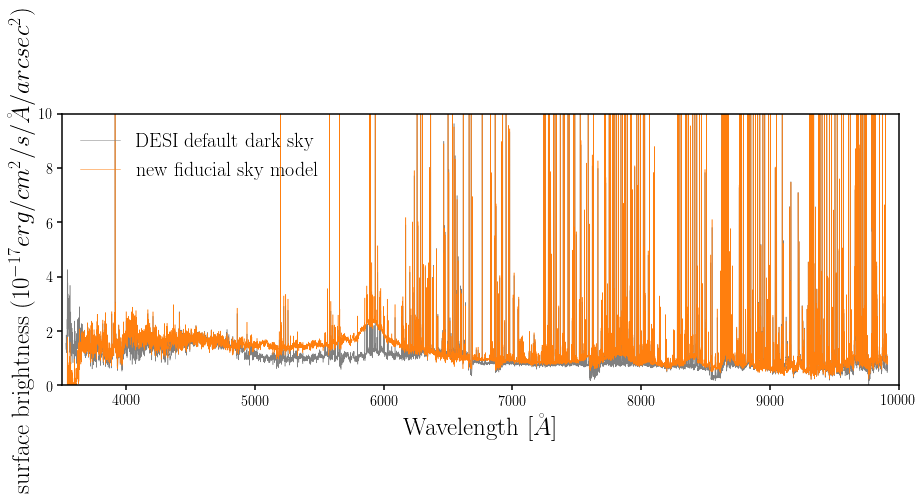

In [11]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(config.wavelength, surface_brightness_dict['dark'].value, c='gray', lw=0.5, label='DESI default dark sky')
sub.plot(config.wavelength, sky_fid.surface_brightness(config.wavelength.value), 
         c='C1', lw=0.5, label='new fiducial sky model')
sub.legend(loc='upper left', fontsize=20)
sub.set_xlabel(r'Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3500., 1.e4])
sub.set_ylabel(r"surface brightness ($10^{-17} erg/cm^{2}/s/\AA/arcsec^2$)", fontsize=25)
sub.set_ylim([0., 10.])